In [0]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#==============================================================================
# import the dataset of Home Buyers prices
#==============================================================================

flatdata = pd.read_csv ('HomeBuyer.csv')

FileNotFoundError: ignored

In [0]:
#==============================================================================
# check for Null values
#==============================================================================

flatdata.isnull().any()


In [0]:
#==============================================================================
# check for data types
#==============================================================================

flatdata.dtypes


Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [0]:
#==============================================================================
# Data exploration
#==============================================================================
flatdata.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [0]:
flatdata.shape

(400, 3)

In [0]:

X = flatdata.iloc [:,[0,1]].values
y = flatdata.iloc [:,2].values

In [0]:
#==============================================================================
# split the dataset into training and test set. We will use 75/25 approach
#==============================================================================

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/4, 
                                                     random_state = 0)

In [0]:
#==============================================================================
# Feature scalling 
#==============================================================================

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) #fit and transform
X_test = independent_scalar.transform (X_test) # only transform

C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
#==============================================================================
# Fit the Logistic regression to the train data. Logistic regression is a 
# linear classifier after which the data is divided by a straight line.
#==============================================================================
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression (random_state = 0)
LRClassifier.fit (X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
#==============================================================================
# Predict the values 
#==============================================================================

prediction = LRClassifier.predict (X_test)


In [0]:
#==============================================================================
# Create confusion matrix to evaluate performance of data
#==============================================================================
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix (y_test, prediction)

print(confusionMatrix)



[[65  3]
 [ 8 24]]


[[5.31793363e-08 5.37693571e-08 5.43659241e-08 ... 3.17626301e-03
  3.21139025e-03 3.24690469e-03]
 [5.42871110e-08 5.48894224e-08 5.54984164e-08 ... 3.24221299e-03
  3.27806718e-03 3.31431655e-03]
 [5.54179616e-08 5.60328197e-08 5.66544997e-08 ... 3.30952776e-03
  3.34612386e-03 3.38312326e-03]
 ...
 [9.78235714e-01 9.78469395e-01 9.78700622e-01 ... 9.99999629e-01
  9.99999633e-01 9.99999637e-01]
 [9.78670360e-01 9.78899475e-01 9.79126182e-01 ... 9.99999636e-01
  9.99999640e-01 9.99999644e-01]
 [9.79096511e-01 9.79321145e-01 9.79543416e-01 ... 9.99999644e-01
  9.99999648e-01 9.99999651e-01]]


[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

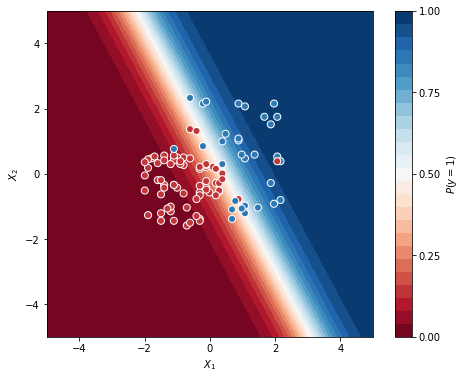

In [0]:
#==============================================================================
# let us visualize it
#==============================================================================
    
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRClassifier.predict_proba(grid)[:, 1].reshape(xx.shape)

print(probs)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [0]:
#==============================================================================
# So now let us visualize the Test set
#==============================================================================
plt.show()

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
acc = accuracy_score(y_test,prediction)

In [0]:
acc

0.89

In [0]:
#==============================================================================
# Fit the Logistic regression to the train data. Logistic regression is a 
# linear classifier after which the data is divided by a straight line.
#==============================================================================
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier ()
KNN.fit (X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
KNN_pred = KNN.predict (X_test)

In [0]:
KNN_acc = accuracy_score(y_test, KNN_pred)
KNN_acc

0.93

In [0]:
KNN_confusionMatrix = confusion_matrix (y_test, KNN_pred)
print(KNN_confusionMatrix)

[[64  4]
 [ 3 29]]


In [0]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit (X_train, y_train)

SVC_pred = SVC.predict (X_test)

SVC_confusionMatrix = confusion_matrix (y_test, SVC_pred)
print(SVC_confusionMatrix)

SVC_acc = accuracy_score(y_test, SVC_pred)
print(SVC_acc)

[[64  4]
 [ 3 29]]
0.93


In [0]:
from sklearn.neural_network import MLPClassifier
Neural_clf = MLPClassifier(max_iter=500)
Neural_clf.fit (X_train, y_train)

Neural_clf_pred = Neural_clf.predict (X_test)

Neural_clf_confusionMatrix = confusion_matrix (y_test, Neural_clf_pred)
print(Neural_clf_confusionMatrix)

Neural_clf_acc = accuracy_score(y_test, Neural_clf_pred)
print(Neural_clf_acc)

[[64  4]
 [ 3 29]]
0.93


[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

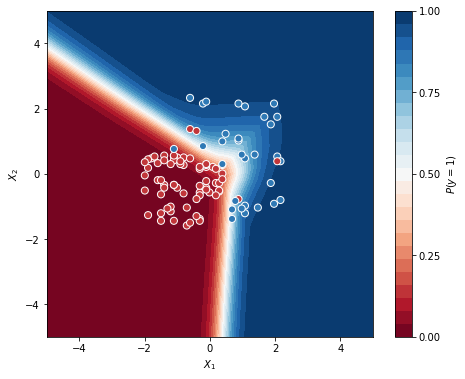

In [0]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = Neural_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

from sklearn.gaussian_process import Gaussian
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
from sklearn.gaussian_process import GaussianProcessClassifier
GP_clf = GaussianProcessClassifier()
GP_clf.fit (X_train, y_train)

GP_clf_pred = GP_clf.predict (X_test)

GP_clf_confusionMatrix = confusion_matrix (y_test, GP_clf_pred)
print(GP_clf_confusionMatrix)

GP_clf_acc = accuracy_score(y_test, GP_clf_pred)
print(GP_clf_acc)

[[64  4]
 [ 3 29]]
0.93


[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

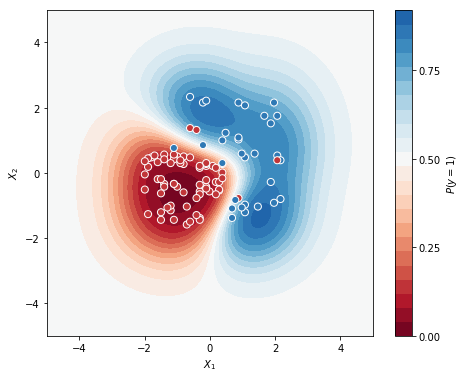

In [0]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = GP_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [0]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier()
DT_clf.fit (X_train, y_train)

DT_clf_pred = DT_clf.predict (X_test)

DT_clf_confusionMatrix = confusion_matrix (y_test, DT_clf_pred)
print(DT_clf_confusionMatrix)

DT_clf_acc = accuracy_score(y_test, DT_clf_pred)
print(DT_clf_acc)

[[62  6]
 [ 4 28]]
0.9


[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

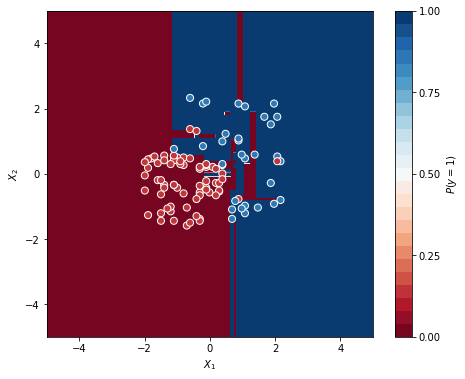

In [0]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = DT_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_clf.fit (X_train, y_train)

RF_clf_pred = RF_clf.predict (X_test)

RF_clf_confusionMatrix = confusion_matrix (y_test, RF_clf_pred)
print(RF_clf_confusionMatrix)

RF_clf_acc = accuracy_score(y_test, RF_clf_pred)
print(RF_clf_acc)

[[64  4]
 [ 4 28]]
0.92


C:\Users\armando_galeana\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[(-5, 5), Text(0,0.5,'$X_2$'), (-5, 5), Text(0.5,0,'$X_1$'), None]

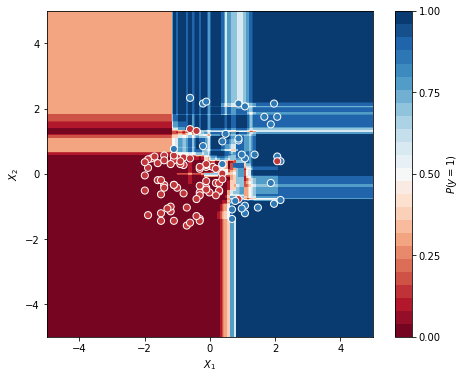

In [0]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = RF_clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_test[:, 0], X_test[:, 1],c = (y_test == 1 ), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")